## Desafío  - Regresión desde el aprendizaje de máquinas

* Para poder realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip

Nombre: Juan Oyarce

#### Contexto
En esta sesión trabajaremos una base de datos sobre los precios de las viviendas en Boston,
utilizada en el paper Harrison Jr, D., & Rubinfeld, D. L. (1978). Hedonic housing prices and the
demand for clean air. Journal of environmental economics and management, 5(1), 81-102.
Nuestro objetivo es desarrollar un modelo predictivo para el valor mediano de las casas mediante el
entrenamiento de un modelo de regresión lineal.


* crim : Tasa de criminalidad por sector de Boston
* zn proporción de terreno residencial asignado para terrenos baldíos.
* indus proporción de negocios no asociados al comercio por sector.
* chas Dummy. 1 si el sector colinda con el río Charles, 0 de lo contrario.
* nox Concentración de dióxido de carbono
* rm cantidad promedio de habitaciones por casa.
* age proporción de casas construídas antes de 1940
* dis distancia promedio a cinco centros de empleos.
* rad índice de accesibilidad a autopistas.
* tax nivel de impuestos asociados a viviendas.
* ptratio razón alumno:profesor por sector de Boston.
* black proporción de afroamericanos por sector de Boston.
* lstat porcentaje de población de estratos bajos.
* medv valor mediano de las casas

### Desafío 1: Prepare el ambiente de trabajo

* Importe las librerías básicas para el análisis de datos.
* Importe el módulo linear_model , y las funciones mean_squared_error , r2_score y train_test_split.
* Importe la base de datos boston.csv y elimine la columna Unnamed: 0.
* Obtenga las medidas descriptivas de la base de datos con .describe().

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('boston.csv').drop('Unnamed: 0', axis=1) # Eliminamos la primera columna
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.describe() #Extraemos las estadísticas descriptivas de las variables numéricas

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Desafío 2: División de la muestra

* Genere conjuntos de entrenamiento y validación con train_test_split.
* Genere una segmentación del 33% para las muestras de validación.
* Incluya una semilla pseudoaleatoria

In [7]:
# generamos la matriz de regresores y el vector objetivo a predecir
y_vector = df.loc[:, 'medv']
x_matriz = df.loc[:, 'crim':'lstat']

In [8]:
# conjunto de entrenamiento y test con los parametros sugeridos
x_train, x_test, y_train, y_test = train_test_split(x_matriz, y_vector, test_size=.33, random_state=18231) 

### Desafío 3: Generación de modelos
Ahora implementaremos dos versiones del modelo lineal:
* Con intercepto y atributos normalizados.
* Sin intercepto y atributos no normalizados.


* Cada versión debe generarse en un nuevo objeto inicializado.
* Posteriormente se deben entrenar los modelos especificando la matriz y vector de entrenamiento.
* Con los modelos entrenados, genere una predicción con su matriz de validación.

In [21]:
modelo_1 = linear_model.LinearRegression(fit_intercept=True, normalize=True)
modelo_1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [22]:
# Estadísticos del modelo

# imprimamos la lista de coeficientes
print("La lista de pendientes: ", x_matriz.columns)
print('\n')
print("El valor de los coficientes de las  pendientes: ", modelo_1.coef_)
print('\n')
# imprimamos el intercepto del modelo
print("El intercepto del modelo es :", modelo_1.intercept_)

La lista de pendientes:  Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')


El valor de los coficientes de las  pendientes:  [-1.44746065e-01  4.75498100e-02  1.31155293e-02  1.25947873e+00
 -1.78647717e+01  3.17924801e+00 -3.88004279e-03 -1.57587255e+00
  3.40354072e-01 -1.36821931e-02 -9.32117515e-01  6.42574783e-03
 -5.31912524e-01]


El intercepto del modelo es : 42.43428523621879


In [20]:
# Predicciones del modelo

modelo_1_yhat = modelo_1.predict(x_test)
print("La cantidad de predicciones realizadas son: ", len(modelo_1_yhat))
print('\n')
print("Las predicciones son: ", modelo_1_yhat.round(2))

La cantidad de predicciones realizadas son:  167


Las predicciones son:  [23.79 24.37  4.51 29.75 30.59 22.82 19.76 27.5  20.91 24.73 24.93 24.28
 20.88 16.99 19.38 20.93 21.66 28.62 12.46 23.54 21.73 42.48 36.99 19.2
 21.67 19.82 19.88 23.2  17.84 23.89 11.51 13.96 31.96 20.26 35.16 34.48
 35.32 21.79 33.41 15.97 14.68 35.47 19.84  4.97 27.12 -3.84 19.35 27.45
 19.26 21.49 32.82 25.47 17.8  19.53 23.88 17.85 26.01 42.46 10.45 20.93
 15.16 34.45 17.33 28.89 14.7  39.86 31.06 13.39 17.81 16.48 21.61 19.74
 29.03  9.38 19.79 28.25 32.38 19.7  31.52 33.93 38.05 36.6  25.11 25.64
 35.38 14.58 16.4  28.61 31.31 13.47 29.99 31.23 14.42 28.72 37.02 22.34
 19.14 28.22 22.43 31.08 15.19 32.1  20.74 21.17 18.03 32.82 30.26 19.63
 29.47 32.45 30.52 38.99 22.52 27.25 25.09 19.59 27.64 12.44 42.04 13.78
 22.18  6.77 13.39 16.65 20.1  22.32 25.18 16.03 18.72 27.16 25.   20.96
 19.7  25.71 17.68 24.83 16.45 31.62 21.72 29.84 21.11 28.18 21.78 27.58
 24.59 19.03 31.37 13.36 20.68 16.26 31.72 29.16 34

In [24]:
modelo_2 = linear_model.LinearRegression(fit_intercept=False, normalize=False)
modelo_2.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [25]:
# Estadísticos del modelo

# imprimamos la lista de coeficientes
print("La lista de pendientes: ", x_matriz.columns)
print('\n')
print("El valor de los coficientes de las  pendientes: ", modelo_2.coef_)
print('\n')
# imprimamos el intercepto del modelo
print("El intercepto del modelo es :", modelo_2.intercept_)

La lista de pendientes:  Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')


El valor de los coficientes de las  pendientes:  [-0.14792651  0.05304955 -0.04693842  0.90938829  0.07411468  5.56396332
 -0.01280929 -1.02877907  0.20307207 -0.01031809 -0.27820542  0.01367089
 -0.38919427]


El intercepto del modelo es : 0.0


In [44]:
# Predicciones del modelo
modelo_2_yhat = modelo_2.predict(x_test)
print("La cantidad de predicciones realizadas son: ", len(modelo_2_yhat))
print('\n')
print("Las predicciones son: ", modelo_2_yhat.round(2))

La cantidad de predicciones realizadas son:  167


Las predicciones son:  [23.46 23.27  6.38 28.16 29.16 21.59 19.62 26.24 19.73 22.96 27.06 22.88
 20.   16.33 20.19 19.74 20.78 27.44 14.47 25.86 21.12 42.6  36.88 21.54
 19.8  22.43 18.98 21.89 18.12 22.67 11.31 14.94 30.93 21.26 36.03 35.87
 35.77 20.64 32.43 16.65 15.66 34.6  21.04  2.91 24.9  -6.21 22.01 28.34
 18.85 20.12 30.35 24.92 16.68 17.73 24.46 19.24 23.03 41.92 10.26 22.09
  9.41 34.01 19.65 27.3  14.63 41.71 29.15 14.74 20.83 17.76 22.09 16.21
 27.21 11.6  22.36 26.04 32.08 20.13 31.06 33.89 37.16 36.5  23.61 24.84
 32.36 17.86 16.16 27.87 30.05 14.12 28.87 29.88 12.29 34.3  39.09 24.
 21.83 26.   19.81 31.66 15.5  30.75 19.42 19.78 17.55 32.12 29.39 16.97
 27.19 29.79 30.8  39.77 22.71 25.78 22.95 20.93 26.69 14.34 44.3  14.36
 20.63  6.64 15.01 17.1  20.6  24.31 25.45 14.07 21.46 25.13 25.13 19.74
 20.59 21.33 13.65 21.34 17.34 29.74 21.25 28.81 21.5  26.93 20.16 26.21
 25.65 18.51 26.85 14.96 21.17 11.58 32.32 24.69 35.

### Desafío 4: Obtención de métricas
* Ahora generemos una función llamada report_scores que ingrese como argumentos el vector de datos predichos y el vector de datos por validar.

* La función debe imprimir las métricas del Error Cuadrático Promedio y R2. 

* Reporte las métricas para ambos modelos. En base a ello, seleccione el mejor modelo.

In [45]:
# Función para generar reportes
def report_scores(datos_predichos, por_validar):
    """
    Definición: Función que genere reportes de un modelo sobre un conjunto de datos predichos y de datos por validar
    Input: 2 vectores que contienen los datos predichos y los datos por validar
    Outpout: la función imprime el Error Cuadrático Promedio y R2.
    """
    mse = mean_squared_error(datos_predichos, por_validar)
    r2 = r2_score(datos_predichos, por_validar)
    print("Error Cuadrático Medio:",mse.round(3),"\n","R2:",r2.round(3))

In [46]:
report_scores(y_test, modelo_1_yhat) 

Error Cuadrático Medio: 27.508 
 R2: 0.73


In [47]:
report_scores(y_test, modelo_2_yhat)

Error Cuadrático Medio: 28.748 
 R2: 0.718


- Como observamos el r2 de los modelos es similar y el error cuadrático medio también, se podría afirmar que el primer modelo que incluye intercepto y normaliza las variables es minimante mejor que el segundo, pero talvez la diferencia al ser tan escaza no sea estadísticamente significativa

### Desafío 5: Refactorización del modelo
* Genere una función llamada fetch_features que ingrese como argumentos la base de datos (df) y el nombre del vector objetivo. El nombre del vector debe ser medv por defecto
* La función debe retornar una lista con las correlaciones entre cada atributo y el vector objetivo y su nombre.
* Reporte brevemente cuales los 6 atributos con una mayor correlación con medv

In [54]:
# Función para obtener las correlaciones de Pearson del vector en comparación al resto del dataframe
def fetch_features(dataframe, vector_objetivo='medv'):
    """
    Definición:Función para obtener las correlaciones de Pearson del vector en comparación al resto del dataframe
    Input:dataframe de origen y vector_objetivo='medv', para este caso por defecto es el valor mediano de las propiedades
    Outpout: retorna un dataframe con el valor de correlación de pearson y la correlación absoluta, ordenadas de manera descendente
    """
    columns = dataframe.columns
    attr_name = []
    pearson_r = []
    abs_pearson_r = []
    for col in columns:
        if col != vector_objetivo:
            attr_name.append(col)
            pearson_r.append(dataframe[col].corr(dataframe[vector_objetivo]))
            abs_pearson_r.append(abs(dataframe[col].corr(dataframe[vector_objetivo])))
            features = pd.DataFrame({'attribute':attr_name, 'corr':pearson_r,'abs_corr':abs_pearson_r})
            features = features.set_index('attribute')
    return  features.sort_values(by=['abs_corr'], ascending=False) 

In [55]:
fetch_features(df)

,corr,abs_corr
attribute,,
lstat,-0.737663,0.737663
rm,0.695360,0.695360
ptratio,-0.507787,0.507787
indus,-0.483725,0.483725
tax,-0.468536,0.468536
nox,-0.427321,0.427321
crim,-0.388305,0.388305
rad,-0.381626,0.381626
age,-0.376955,0.376955


*Los 6 atributos más significativos son 'nox' con una tendencia negativa, 'tax' también con tendencia negativa, 'indus, 'ptratio' e 'istat' también con tendencias negativas, y rm con una tendencia positiva en la regresión de 'medv' 

### Desafío 6: Refactorización del modelo predictivo
* Genere otros conjuntos de entrenamiento y validación en base a una matriz con los 6 atributos identificados y el vector objetivo.
* Entrene un modelo en base al mejor desempeño.
* Reporte las métricas para el nuevo modelo.

In [57]:
y_vec_2 = df.loc[:, 'medv']
x_mat_2 = df.loc[:, ['lstat', 'rm', 'ptratio', 'indus', 'tax', 'nox']]

In [58]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_mat_2, y_vec_2, test_size=.33, random_state=18231)

In [59]:
modelo_3 = linear_model.LinearRegression(fit_intercept=True, normalize=True)
modelo_3.fit(x_train_2, y_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [60]:
# Estadísticos del modelo

# imprimamos la lista de coeficientes
print("La lista de pendientes: ", x_mat_2.columns)
print('\n')
print("El valor de los coficientes de las  pendientes: ", modelo_3.coef_)
print('\n')
# imprimamos el intercepto del modelo
print("El intercepto del modelo es :", modelo_3.intercept_)

La lista de pendientes:  Index(['lstat', 'rm', 'ptratio', 'indus', 'tax', 'nox'], dtype='object')


El valor de los coficientes de las  pendientes:  [-5.48193020e-01  3.92796727e+00 -8.69237421e-01  7.81404441e-02
 -2.04501560e-03 -5.12809675e+00]


El intercepto del modelo es : 23.530900520734058


In [62]:
# Predicciones del modelo
modelo_3_yhat = modelo_3.predict(x_test_2)
print("La cantidad de predicciones realizadas son: ", len(modelo_3_yhat))
print('\n')
print("Las predicciones son: ", modelo_3_yhat.round(2))

La cantidad de predicciones realizadas son:  167


Las predicciones son:  [23.95 25.34  3.57 27.49 27.44 20.96 18.84 25.93 21.   20.84 30.39 22.18
 19.15 16.39 16.84 19.02 25.01 26.48 15.83 23.31 20.16 38.35 35.06 18.85
 20.22 17.63 19.94 24.34 18.76 22.89 13.32 15.04 31.55 18.48 33.72 34.02
 30.43 19.95 30.45 18.54 14.86 32.55 21.37 14.64 29.55 -0.05 21.02 27.65
 21.36 23.94 33.11 25.02 19.57 20.04 25.38 18.38 27.24 38.73  8.14 19.79
 20.03 31.72 15.96 27.8  12.18 38.43 28.02 13.51 17.37 15.09 20.05 17.5
 27.88 10.71 21.18 24.31 34.15 23.39 33.12 31.3  37.95 34.24 21.98 25.18
 32.23 19.59 14.02 26.51 29.35 10.65 31.43 26.99 14.08 35.   37.06 24.97
 20.07 26.25 21.67 31.37 17.71 33.15 21.91 22.13 19.12 27.61 31.72 21.94
 26.95 30.78 29.95 39.43 20.46 25.67 20.81 19.29 25.97 12.96 40.07 11.24
 22.94  2.81 17.25 14.12 23.47 22.31 27.82 13.45 19.54 24.69 25.23 19.49
 20.8  26.94 17.36 24.97 22.4  29.35 24.92 30.14 19.63 27.75 19.14 28.94
 27.72 17.4  29.89 11.79 20.96 15.48 31.   28.66 31

In [63]:
report_scores(y_test_2, modelo_3_yhat)

Error Cuadrático Medio: 32.768 
 R2: 0.679


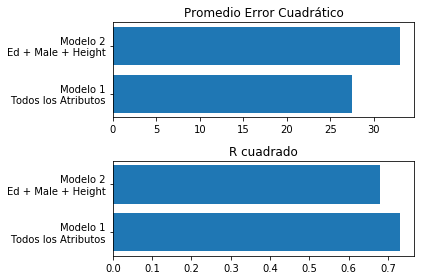

In [67]:
#  Comparación gráfica del modelo original con todos los atributos y el modelo refactorizado

m2_mse = mean_squared_error(y_test_2, modelo_3_yhat).round(0)
m2_r2 = r2_score(y_test_2, modelo_3_yhat).round(2)
m1_mse= mean_squared_error(y_test, modelo_1_yhat)
m1_r2= r2_score(y_test, modelo_1_yhat)
plt.subplot(2,1,1)
plt.barh(['Modelo 1\nTodos los Atributos', 'Modelo 2\nEd + Male + Height'], [m1_mse, m2_mse])
plt.title("Promedio Error Cuadrático")
plt.subplot(2,1, 2)
plt.barh(['Modelo 1\nTodos los Atributos', 'Modelo 2\nEd + Male + Height'], [m1_r2, m2_r2])
plt.title("R cuadrado");
plt.tight_layout()



- Se puede apreciar que el modelo presenta un error cuádratico medio un poco mayor y un r2 menor que el modelo anterior que combinaba todos los atributos, pero al respecto se puede señalar que ha disminuído la complejidad, de 13 a 6 variables predictoras

### Desafío 7: Predicción de casos
A continuación se generaron dos arrays que representan el peor escenario posible
( worst_neighbor ) y el mejor escenario posible ( best_neighbor ).

Ingrese los arrays en el modelo entrenado y reporte cuál sería el valor esperado dada las
condiciones

worst_neighbor = np.array([37.9, 12.6, 3.5, 27.7, 187, 0.87]).reshape(1, -1)


best_neighbor = np.array([1.73, 22, 8.7, 0.46, 711, 0.38]).reshape(1, -1)


Los valores númericos representan los siguientes atributos ['lstat', 'ptratio', 'rm', 'indus', 'tax', 'nox'].


In [73]:
# Peor vecindario
worst_neighbor = modelo_3.predict(np.array([37.9, 3.5, 12.6, 27.7, 187, 0.87]).reshape(1, -1))
print( 'El valor predicho para el valor de las propiedades del peor vecindario es: ',worst_neighbor[0].round(3))

El valor predicho para el valor de las propiedades del peor vecindario es:  2.871


In [74]:
# Mejor vecindario
best_neighbor= modelo_3.predict(np.array([1.73, 8.7, 22, 0.46, 711, 0.38]).reshape(1, -1))
print( 'El valor predicho para el valor de las propiedades del mejor vecindario es: ',best_neighbor[0].round(3))

El valor predicho para el valor de las propiedades del mejor vecindario es:  34.266
